In [1]:
#%%pycodestyle
# Load package to confirm the code is PEP-8 formmat
#pip install pycodestyle
#pip install pycodestyle_magic
%load_ext pycodestyle_magic
# Load libraries
import pandas as pd
import numpy as np
import re
# Checking
# pd
# np

In [2]:
# Set display to see data.
pd.set_option('display.width', 4000)
pd.set_option('max_colwidth', 4000)
pd.set_option('max_rows', 100)
pd.set_option('max_columns', 200)

In [3]:
#%%pycodestyle
# Load dataframe
df = pd.read_csv("./DOT_teste_data_science.csv", encoding='ISO-8859-1')

In [4]:
#%%pycodestyle
# Change Column names
df.columns = ['Id', 'PlaceTest', 'DateTest',
              'Rate', 'TextRate', 'HourTest',
              'Sex', 'MaritalStatus', 'Education',
              'Hometown', 'Neighborhood']

# Create new dataframe with the changes and preserve the original
# Drop ID column
#df2 = df.drop(['Id'], axis=1)
df2 = df

# Show new dataframe
df2.head()

,Id,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood
0,0,GO - Goiás,13/01/2017,"7,45","2,2",manhã,Masculino,Casado(a),Ensino médio,fortaleza,Asa Sul
1,1,GO - Goiás,10/01/2017,"7,4","2,4",manhã,Masculino,Casado(a),Especialização,Recife,Norte (Águas Claras)
2,2,GO - Goiás,07/01/2017,"7,3","1,8",manhã,Masculino,Casado(a),Superior,BRASILIA,Setor Sudoeste
3,3,GO - Goiás,02/01/2017,"7,2","1,7",Noite,Masculino,Solteiro(a),Ensino médio,Brasília,Setor Norte
4,4,GO - Goiás,09/01/2017,"6,95","1,7",manhã,Feminino,Solteiro(a),Superior,BRASÍLIA,Guará I


In [5]:
#%%pycodestyle
# Check if there is all values.
df2.isnull().values.any()

True

In [6]:
#%%pycodestyle
# Unique Counts


def isNaN(df):
    for i in df.columns:
        count = df[i].isnull().values.any()
        print(i, ": ", count)


# Check all columns, True = There is NaN, False = There is no Nan.
print(isNaN(df2))

Id :  False
PlaceTest :  False
DateTest :  True
Rate :  False
TextRate :  False
HourTest :  True
Sex :  True
MaritalStatus :  True
Education :  True
Hometown :  True
Neighborhood :  True
None


In [7]:
#%%pycodestyle
print('dtypes: ')
df2.dtypes

dtypes: 


Id                int64
PlaceTest        object
DateTest         object
Rate             object
TextRate         object
HourTest         object
Sex              object
MaritalStatus    object
Education        object
Hometown         object
Neighborhood     object
dtype: object

In [8]:
# Change comma to point.
df2.Rate.replace(",", ".", regex=True, inplace=True)
df2.TextRate.replace(",", ".", regex=True, inplace=True)
# Transform Rate and TextRate to float.
df2[["Rate", "TextRate"]] = df2[["Rate", "TextRate"]].apply(pd.to_numeric)

In [9]:
# Create new column to identify if this student has been approved, or not.
conditions = [(df2['Rate'] >= 5.0) & (df2['TextRate'] > 0.0)]
choices = [1]

df2['Approved'] = np.select(conditions, choices, default=0)


In [62]:
# Create new column to with All Rate.
df2['AllRate'] = df2['Rate'] + df2['TextRate']


In [63]:
# Create new column to identify who doesn't got the rate above 0.
conditions = [(df2['TextRate'] > 0.0)]
choices = [1]

df2['HasTextRate'] = np.select(conditions, choices, default=0)


In [64]:
df2.head()

,Id,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate
0,0,21,13/01/2017,7.45,2.2,1,1,1,3,fortaleza,Asa Sul,1,9.65,1
1,1,21,10/01/2017,7.40,2.4,1,1,1,4,Recife,Norte (Águas Claras),1,9.80,1
2,2,21,07/01/2017,7.30,1.8,1,1,1,8,BRASILIA,Setor Sudoeste,1,9.10,1
3,3,21,02/01/2017,7.20,1.7,2,1,4,3,Brasília,Setor Norte,1,8.90,1
4,4,21,09/01/2017,6.95,1.7,1,2,4,8,BRASÍLIA,Guará I,1,8.65,1


In [86]:
# Correlation
cols = ['PlaceTest', 'HourTest', 'Sex', 'MaritalStatus', 'Education']
print(df2[cols].corr())

               PlaceTest      Rate  TextRate  HourTest       Sex  MaritalStatus  Education  Approved  HasTextRate
PlaceTest       1.000000 -0.029688 -0.007552  0.048759  0.011931       0.009447  -0.024435 -0.021583    -0.014811
Rate           -0.029688  1.000000  0.914293 -0.006001 -0.132599      -0.062073   0.189652  0.884397     0.894960
TextRate       -0.007552  0.914293  1.000000  0.002686 -0.091577      -0.039583   0.179295  0.907747     0.958287
HourTest        0.048759 -0.006001  0.002686  1.000000  0.033077       0.030032   0.012779 -0.005175     0.001033
Sex             0.011931 -0.132599 -0.091577  0.033077  1.000000       0.122772   0.030327 -0.096539    -0.100262
MaritalStatus   0.009447 -0.062073 -0.039583  0.030032  0.122772       1.000000  -0.032322 -0.051879    -0.054593
Education      -0.024435  0.189652  0.179295  0.012779  0.030327      -0.032322   1.000000  0.162725     0.153026
Approved       -0.021583  0.884397  0.907747 -0.005175 -0.096539      -0.051879   0.1627

In [88]:
# Atributos e Variável target
features = df2[['PlaceTest', 'HourTest', 'Sex', 'MaritalStatus', 'Education']]
targetVariables = df2.Approved

In [65]:
#%%pycodestyle
print('dtypes: ')
df2.dtypes

dtypes: 


Id                 int64
PlaceTest          int64
DateTest          object
Rate             float64
TextRate         float64
HourTest           int64
Sex                int64
MaritalStatus      int64
Education          int64
Hometown          object
Neighborhood      object
Approved           int64
AllRate          float64
HasTextRate        int64
dtype: object

In [66]:
#%%pycodestyle
print('Decribe: ')
df2.describe()

Decribe: 


,Id,PlaceTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Approved,AllRate,HasTextRate
count,12100.000000,12100.000000,12100.000000,12100.000000,12100.000000,12100.000000,12100.000000,12100.000000,12100.000000,12100.000000,12100.000000
mean,6049.500000,9.806612,4.577988,0.874373,1.557190,1.444463,3.053471,4.680331,0.481570,5.452361,0.532314
std,3493.113463,6.714475,1.704218,0.855287,0.503351,0.503536,1.369632,2.431158,0.499681,2.510222,0.498975
min,0.000000,1.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000
25%,3024.750000,3.000000,3.000000,0.000000,1.000000,1.000000,1.000000,3.000000,0.000000,3.000000,0.000000
50%,6049.500000,9.000000,4.850000,1.100000,2.000000,1.000000,4.000000,3.000000,0.000000,6.150000,1.000000
75%,9074.250000,16.000000,5.950000,1.700000,2.000000,2.000000,4.000000,8.000000,1.000000,7.600000,1.000000
max,12099.000000,21.000000,10.000000,2.500000,2.000000,2.000000,5.000000,9.000000,1.000000,12.500000,1.000000


In [13]:
#%%pycodestyle
print('Info: ')
df2.info()

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12100 entries, 0 to 12099
Data columns (total 12 columns):
Id               12100 non-null int64
PlaceTest        12100 non-null object
DateTest         12060 non-null object
Rate             12100 non-null float64
TextRate         12100 non-null float64
HourTest         12060 non-null object
Sex              12060 non-null object
MaritalStatus    12060 non-null object
Education        12060 non-null object
Hometown         12060 non-null object
Neighborhood     12060 non-null object
Approved         12100 non-null int64
dtypes: float64(2), int64(2), object(8)
memory usage: 1.1+ MB


In [14]:
#%%pycodestyle
# Unique Counts


def unique_counts(df):
    for i in df.columns:
        count = df[i].nunique()
        print(i, ": ", count)


print(unique_counts(df2))

Id :  12100
PlaceTest :  21
DateTest :  34
Rate :  123
TextRate :  26
HourTest :  2
Sex :  2
MaritalStatus :  6
Education :  10
Hometown :  4602
Neighborhood :  4426
Approved :  2
None


In [15]:
#%%pycodestyle
print('Sex: ', df.Sex.unique())
print('HourTest: ', df.HourTest.unique())
print('MaritalStatus: ', df.MaritalStatus.unique())
print('Education: ', df.Education.unique())
print('PlaceTest: ', df.PlaceTest.unique())

Sex:  ['Masculino' 'Feminino' nan]
HourTest:  ['manhã' 'Noite' nan]
MaritalStatus:  ['Casado(a)' 'Solteiro(a)' 'Divorciado(a)' 'Separado(a)' 'Viúvo(a)' nan
 '0']
Education:  ['Ensino médio' 'Especialização' 'Superior' 'Superior incompleto'
 'Mestrado' 'MBA' 'Nível técnico' 'Ensino fundamental' nan 'Doutorado'
 'Não informado']
PlaceTest:  ['GO - Goiás' 'MG - Minas Gerais' 'MS - Mato Grosso do Sul' 'PA - Pará'
 'PB - Paraíba' 'RJ - Rio de Janeiro' 'SC - Santa Catarina' 'SE - Sergipe'
 'CE - Ceará' 'PI - Piauí' 'RN - Rio Grande do Norte' 'BA - Bahia'
 'RS - Rio Grande do Sul' 'RO - Rondônia' 'MT - Mato Grosso'
 'PE - Pernambuco' 'RR - Roraima' 'MA - Maranhão' 'ES - Espírito Santo'
 'TO - Tocantins' 'AM - Amazonas']


In [16]:
#%%pycodestyle
# Change Sex from text to integer: 0 - NaN, 1-Male, 2-Female.
conditions = [(df2['Sex'] == 'Masculino'),
              (df2['Sex'] == 'Feminino')]
choices = [1, 2]

df2['Sex'] = np.select(conditions, choices, default=0)

In [17]:
df2.groupby('Sex').apply(lambda df2: df2.sample(1))

,,Id,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved
Sex,,,,,,,,,,,,,
0,6593,6593,GO - Goiás,NaN,3.25,0.0,NaN,0,NaN,NaN,NaN,NaN,0
1,9401,9401,BA - Bahia,04/08/2016,7.50,2.0,Noite,1,Solteiro(a),Ensino médio,Tanquinho,Escada,1
2,10352,10352,PA - Pará,30/07/2016,3.50,0.0,Noite,2,Solteiro(a),Ensino médio,Capanema,Primeira,0


In [18]:
#%%pycodestyle
# Change HourTest from text to integer: 0 - NaN, 1-Morning, 2-Evening
conditions = [(df2['HourTest'] == 'manhã'),
              (df2['HourTest'] == 'Noite')]
choices = [1, 2]

df2['HourTest'] = np.select(conditions, choices, default=0)

In [19]:
df2.groupby('HourTest').apply(lambda df2: df2.sample(1))

,,Id,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved
HourTest,,,,,,,,,,,,,
0,4547,4547,BA - Bahia,NaN,2.75,0.0,0,0,NaN,NaN,NaN,NaN,0
1,6928,6928,SC - Santa Catarina,17/01/2017,2.50,0.0,1,1,Solteiro(a),Ensino médio,ANCHIETA,LINHA SÃO JOSÉ,0
2,8059,8059,MS - Mato Grosso do Sul,29/07/2016,7.30,1.8,2,2,Solteiro(a),Especialização,Nova Alvorada do Sul,Maria de Lourdes,1


In [20]:
#%%pycodestyle
# Change MaritalStatus from text to integer: 0 - NaN or 0,
# 1-Married, 2-Divorced, 3-Separated, 4-Single, 5-Widow
conditions = [(df2['MaritalStatus'] == 'Casado(a)'),
              (df2['MaritalStatus'] == 'Divorciado(a)'),
              (df2['MaritalStatus'] == 'Separado(a)'),
              (df2['MaritalStatus'] == 'Solteiro(a)'),
              (df2['MaritalStatus'] == 'Viúvo(a)')]
choices = [1, 2, 3, 4, 5]

df2['MaritalStatus'] = np.select(conditions, choices, default=0)

In [21]:
df2.groupby('MaritalStatus').apply(lambda df2: df2.sample(1))

,,Id,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved
MaritalStatus,,,,,,,,,,,,,
0,6593,6593,GO - Goiás,NaN,3.25,0.0,0,0,0,NaN,NaN,NaN,0
1,10047,10047,GO - Goiás,12/08/2016,7.60,2.1,2,1,1,Ensino médio,Piranhas,Setor Central,1
2,789,789,GO - Goiás,05/01/2017,5.55,1.8,2,2,2,Especialização,ITUMBIARA,Setor Central,1
3,5142,5142,RJ - Rio de Janeiro,12/01/2017,3.25,0.0,1,1,3,Ensino médio,RIO DE JANEIRO,Campo Grande,0
4,4752,4752,PA - Pará,07/01/2017,2.75,0.0,1,1,4,Ensino fundamental,PARAGOMINAS,Jaderlândia,0
5,2745,2745,MS - Mato Grosso do Sul,15/01/2017,2.75,0.0,2,2,5,Especialização,Colorado,Cohafaba III Plano,0


In [22]:
#%%pycodestyle
# Change Education from text to integer: 0 - NaN or 0,
# 1-Married, 2-Divorced, 3-Separated, 4-Single, 5-Widow
conditions = [(df2['Education'] == 'Doutorado'),
              (df2['Education'] == 'Ensino fundamental'),
              (df2['Education'] == 'Ensino médio'),
              (df2['Education'] == 'Especialização'),
              (df2['Education'] == 'MBA'),
              (df2['Education'] == 'Mestrado'),
              (df2['Education'] == 'Nível técnico'),
              (df2['Education'] == 'Superior'),
              (df2['Education'] == 'Superior incompleto')]
choices = [1, 2, 3, 4, 5, 6, 7, 8, 9]

df2['Education'] = np.select(conditions, choices, default=0)

In [23]:
df2.groupby('Education').apply(lambda df2: df2.sample(1))

,,Id,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved
Education,,,,,,,,,,,,,
0,4433,4433,BA - Bahia,NaN,3.50,0.0,0,0,0,0,NaN,NaN,0
1,2133,2133,GO - Goiás,13/01/2017,5.85,1.6,1,2,1,1,Goias,Jardim América,1
2,2875,2875,PA - Pará,15/01/2017,4.85,1.6,2,1,4,2,tailândia pará,Vila de Taciteua,0
3,2410,2410,MG - Minas Gerais,15/01/2017,3.25,0.0,2,1,1,3,belo horizonte,Letícia,0
4,10101,10101,GO - Goiás,12/08/2016,6.70,2.2,1,2,1,4,Mara Rosa,Zona Rural,1
5,2194,2194,GO - Goiás,17/01/2017,5.30,1.3,2,1,4,5,Afonso cunha,Residencial Morada do Bosque,1
6,1516,1516,MS - Mato Grosso do Sul,06/01/2017,6.00,2.0,2,1,4,6,Aparecida do Taboado,Jardim Morumbi,1
7,10114,10114,GO - Goiás,11/08/2016,6.35,1.6,2,1,4,7,Uruaçu,Setor Central,1
8,8424,8424,RS - Rio Grande do Sul,11/08/2016,7.55,1.8,1,1,4,8,Ijuí,Centro,1


In [24]:
#%%pycodestyle
# Change Placetest from text to integer: 0 - NaN,
# 1-MG - Minas Gerais
# 2-MS - Mato Grosso do Sul
# 3-PA - Pará
# 4-PB - Paraíba
# 5-RJ - Rio de Janeiro
# 6-SC - Santa Catarina
# 7-SE - Sergipe
# 8-CE - Ceará
# 9-PI - Piauí
# 10-RN - Rio Grande do Norte
# 11-BA - Bahia
# 12-RS - Rio Grande do Sul
# 13-RO - Rondônia
# 14-MT - Mato Grosso
# 15-PE - Pernambuco
# 16-RR - Roraima
# 17-MA - Maranhão
# 18-ES - Espírito Santo
# 19-TO - Tocantins
# 20-AM - Amazonas
# 21-GO - Goiás
conditions = [(df2['PlaceTest'] == 'MG - Minas Gerais'),
              (df2['PlaceTest'] == 'MS - Mato Grosso do Sul'),
              (df2['PlaceTest'] == 'PA - Pará'),
              (df2['PlaceTest'] == 'PB - Paraíba'),
              (df2['PlaceTest'] == 'RJ - Rio de Janeiro'),
              (df2['PlaceTest'] == 'SC - Santa Catarina'),
              (df2['PlaceTest'] == 'SE - Sergipe'),
              (df2['PlaceTest'] == 'CE - Ceará'),
              (df2['PlaceTest'] == 'PI - Piauí'),
              (df2['PlaceTest'] == 'RN - Rio Grande do Norte'),
              (df2['PlaceTest'] == 'BA - Bahia'),
              (df2['PlaceTest'] == 'RS - Rio Grande do Sul'),
              (df2['PlaceTest'] == 'RO - Rondônia'),
              (df2['PlaceTest'] == 'MT - Mato Grosso'),
              (df2['PlaceTest'] == 'PE - Pernambuco'),
              (df2['PlaceTest'] == 'RR - Roraima'),
              (df2['PlaceTest'] == 'MA - Maranhão'),
              (df2['PlaceTest'] == 'ES - Espírito Santo'),
              (df2['PlaceTest'] == 'TO - Tocantins'),
              (df2['PlaceTest'] == 'AM - Amazonas'),
              (df2['PlaceTest'] == 'GO - Goiás'),
              ]
choices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
           15, 16, 17, 18, 19, 20, 21]

df2['PlaceTest'] = np.select(conditions, choices, default=0)

In [25]:
df2.groupby('PlaceTest').apply(lambda df2: df2.sample(1))

,,Id,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved
PlaceTest,,,,,,,,,,,,,
1,151,151,1,15/01/2017,6.65,1.9,2,1,4,9,SETE LAGOAS,Santa Luzia,1
2,297,297,2,02/01/2017,6.50,2.0,2,2,1,9,DOURADOS,Alto Maracaju,1
3,7468,7468,3,07/08/2016,5.40,1.4,1,1,4,3,CASTANHAL,Distrito Industrial,1
4,3188,3188,4,15/01/2017,1.50,0.0,1,1,4,3,JOÃO PESSOA PB,CENTRO,0
5,7696,7696,5,07/01/2017,6.25,1.5,2,2,4,8,joão pessoa,Paraíso,1
6,2274,2274,6,15/01/2017,5.70,1.7,2,2,4,4,mondaí,Vila Catres,1
7,4331,4331,7,15/01/2017,3.75,0.0,2,1,4,3,Tobias barreto,Centro,0
8,1844,1844,8,12/01/2017,6.40,1.9,1,1,2,8,Tauá,zona rural,1
9,1024,1024,9,16/01/2017,6.20,1.7,2,2,4,4,campo maior,fripisa,1


In [26]:
df2.head()

,Id,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved
0,0,21,13/01/2017,7.45,2.2,1,1,1,3,fortaleza,Asa Sul,1
1,1,21,10/01/2017,7.40,2.4,1,1,1,4,Recife,Norte (Águas Claras),1
2,2,21,07/01/2017,7.30,1.8,1,1,1,8,BRASILIA,Setor Sudoeste,1
3,3,21,02/01/2017,7.20,1.7,2,1,4,3,Brasília,Setor Norte,1
4,4,21,09/01/2017,6.95,1.7,1,2,4,8,BRASÍLIA,Guará I,1


In [27]:
df2[['Rate', 'TextRate']].describe()

,Rate,TextRate
count,12100.000000,12100.000000
mean,4.577988,0.874373
std,1.704218,0.855287
min,0.750000,0.000000
25%,3.000000,0.000000
50%,4.850000,1.100000
75%,5.950000,1.700000
max,10.000000,2.500000


In [28]:
pd.crosstab(df2['Approved'], df2['PlaceTest'])


#pd.crosstab(sample['is_booking'], sample['srch_rm_cnt'])
#sample.groupby('srch_rm_cnt')['is_booking'].mean()
#sample['srch_children_cnt'].corr(sample['is_booking'])
#sample.corr()

PlaceTest,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
Approved,,,,,,,,,,,,,,,,,,,,,
0,467,421,934,261,297,225,169,264,81,147,480,131,244,167,125,457,394,77,128,40,764
1,431,416,622,348,480,320,73,292,60,83,411,280,209,165,84,326,334,49,197,65,582


In [29]:
df2[['PlaceTest', 'DateTest', 'Rate', 'TextRate', 'HourTest', 'Sex', 'MaritalStatus', 'Education', 'Hometown', 'Neighborhood', 'Approved']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0de621668>,
      dtype=object)

In [30]:
df2.groupby('Approved')['Approved']\
    .agg({'HowMany': 'count'})\

/home/oracy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,HowMany
Approved,
0,6273
1,5827


In [31]:
df2.assign(NotApproved=1 - df2['Approved']).groupby('PlaceTest').sum().reset_index()

,PlaceTest,Id,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Approved,NotApproved
0,1,2711864,4127.05,707.80,1326,1270,2514,4569,431,467
1,2,4355763,3835.20,722.20,1372,1199,2530,4143,416,421
2,3,9841463,6613.10,1109.60,2359,2367,5204,6474,622,934
3,4,3227017,2995.15,620.40,861,821,1777,3035,348,261
4,5,4237987,4052.96,836.71,1179,1073,2189,3992,480,297
5,6,3003045,2718.55,616.30,915,755,1528,2647,320,225
6,7,766885,972.25,179.50,335,335,789,1082,73,169
7,8,3452928,2682.55,539.30,844,784,1783,2672,292,264
8,9,440202,603.45,130.70,228,219,428,756,60,81
9,10,1057024,937.95,184.20,347,346,739,1084,83,147


In [40]:
df_Winners = df2[df2.Approved == 1]
df_Losers = df2[df2.Approved == 0]

In [41]:
df_Winners.describe()
df_Losers.describe()

,Id,PlaceTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Approved
count,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.0
mean,6566.060896,9.946278,3.125410,0.126128,1.559700,1.491312,3.121951,4.299059,0.0
std,3263.863546,6.800886,0.784332,0.394745,0.504743,0.508188,1.344496,2.268243,0.0
min,39.000000,1.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,3893.000000,3.000000,2.750000,0.000000,1.000000,1.000000,1.000000,3.000000,0.0
50%,5608.000000,10.000000,3.000000,0.000000,2.000000,1.000000,4.000000,3.000000,0.0
75%,10530.000000,16.000000,3.500000,0.000000,2.000000,2.000000,4.000000,7.000000,0.0
max,12099.000000,21.000000,6.250000,1.700000,2.000000,2.000000,5.000000,9.000000,0.0


In [34]:
df3.groupby(['PlaceTest']).aggregate('count').reset_index().sort_values('PlaceTest', ascending=False)

,PlaceTest,Id,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved
20,21,582,577,582,582,582,582,582,582,577,577,582
19,20,65,65,65,65,65,65,65,65,65,65,65
18,19,197,197,197,197,197,197,197,197,197,197,197
17,18,49,49,49,49,49,49,49,49,49,49,49
16,17,334,333,334,334,334,334,334,334,333,333,334
15,16,326,326,326,326,326,326,326,326,326,326,326
14,15,84,84,84,84,84,84,84,84,84,84,84
13,14,165,165,165,165,165,165,165,165,165,165,165
12,13,209,209,209,209,209,209,209,209,209,209,209
11,12,280,280,280,280,280,280,280,280,280,280,280


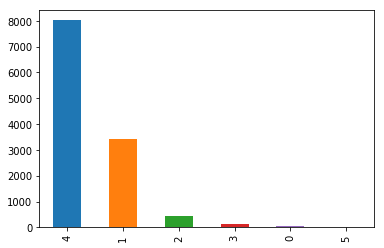

In [54]:
df2.MaritalStatus.value_counts()[:].plot(kind='bar')

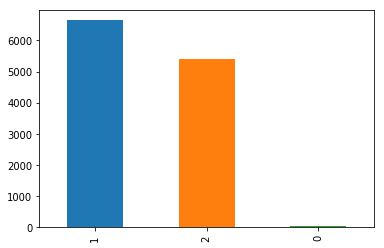

In [55]:
df2.Sex.value_counts()[:].plot(kind='bar')

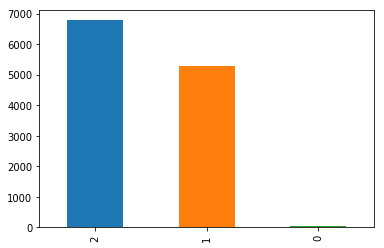

In [56]:
df2.HourTest.value_counts()[:].plot(kind='bar')

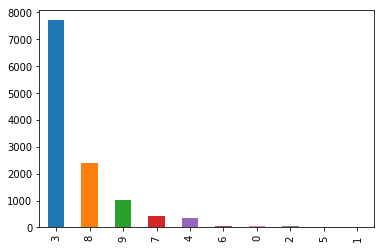

In [57]:
df2.Education.value_counts()[:].plot(kind='bar')

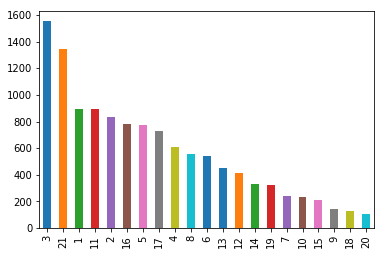

In [58]:
df2.PlaceTest.value_counts()[:].plot(kind='bar')

In [39]:
rfmTable = df3.groupby('PlaceTest').agg({'Id': lambda x: x.count()})

rfmTable['Id'] = rfmTable['Id'].astype(int)
rfmTable.rename(columns={'Id': 'frequency'}, inplace=True)
rfmTable

,frequency
PlaceTest,
1,431
2,416
3,622
4,348
5,480
6,320
7,73
8,292
9,60
